**Question 1a**

(200, 100)


<BarContainer object of 32 artists>

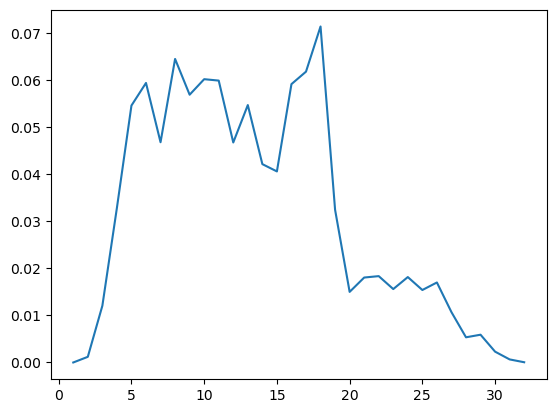

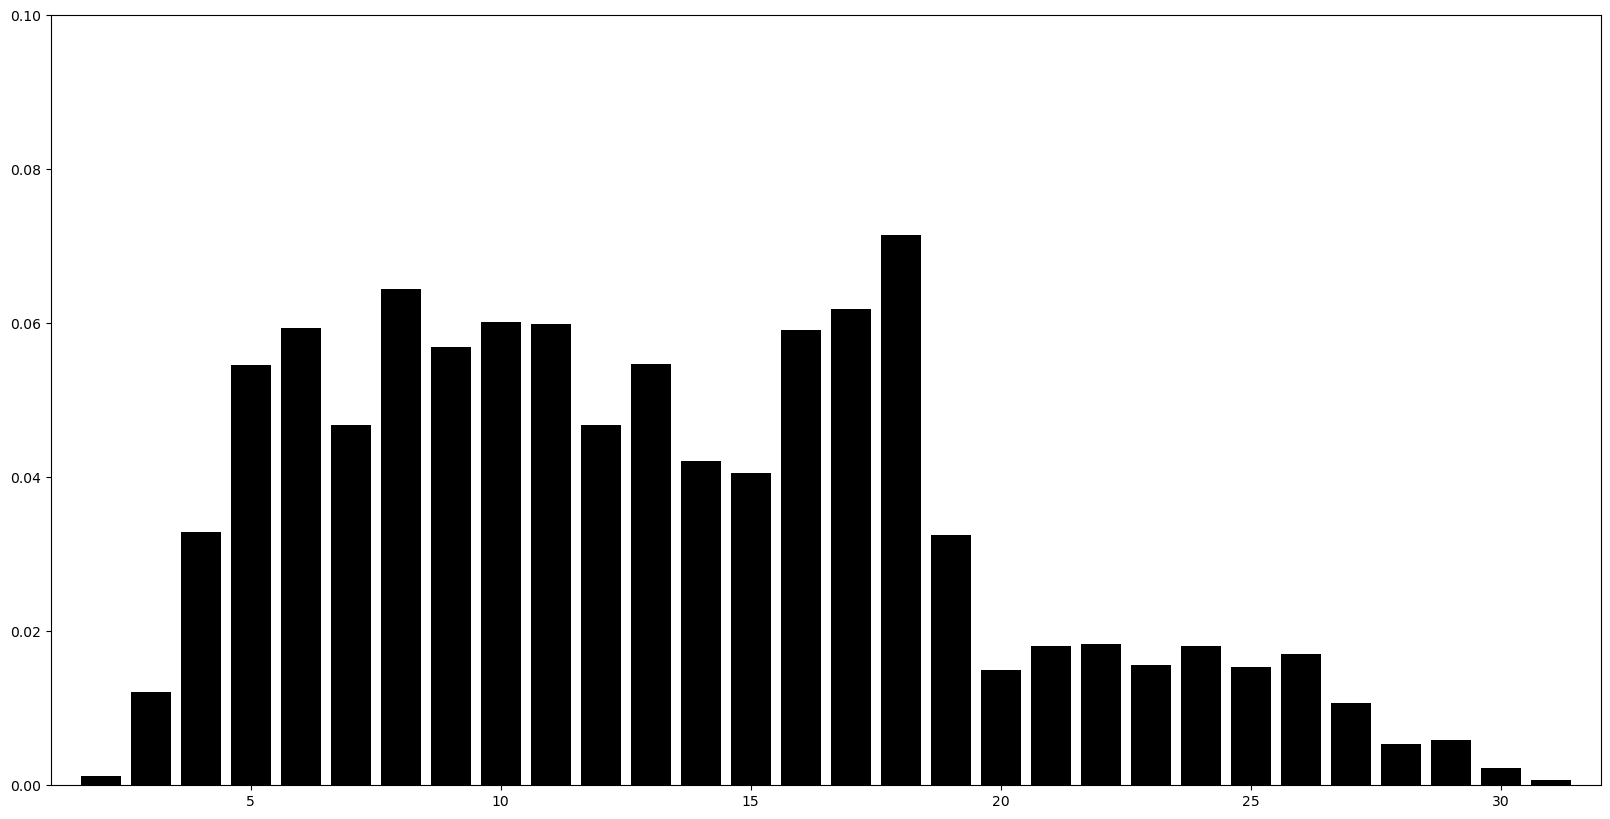

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_rgb = cv2. imread('C:\\Users\\sahua\\Downloads\\EE722\\Assignment_3\\Input\\Q1_Image.jpg')
img_gray = cv2. cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


x,y=img_gray.shape

r=(x//2)
p=(y//2)
roi = img_gray[r-100:r+100,p-50:p+50]
print(roi.shape)

cv2.imwrite('C:\\Users\\sahua\\Downloads\\EE722\\Assignment_3\\Output\\Q1_Image.jpg',roi)

s = roi.flatten()
s_max=max(s)
s_min=min(s)
m=32
b_s =(s_max-s_min)/m
import math
import numpy as np
def pixel_intensity_distribution(s):
    H=np.zeros(m)
    
    for j in range(0,m):
        #print(H[j])
        
        for i in range (len(s)):
            
            b_i=math.floor(((s[i]-s_min)/b_s))+1
            if b_i == j:
                H[j]+=(1/len(s))
            else:
                H[j]+= 0
    return H
Hist=pixel_intensity_distribution(s)
x=np.arange(1,m+1,1)
plt.plot(x,Hist)
plt.figure(figsize=(20,10))

plt.xlim(1,32)
plt.ylim(0,0.1)
plt.bar(x, Hist, color ='black')

**Question 1b**

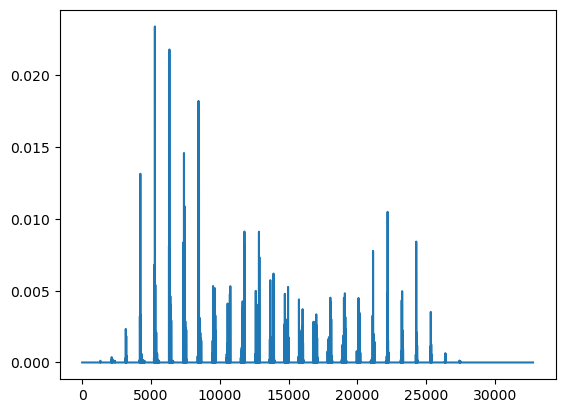

In [13]:
def bin_index(roi):

    h,w,_ = roi.shape
    bpc = 32
    bs = 256/32
    bix_arr = []
    for x in range(h):
        for y in range(w):
            R = roi[x,y,0]
            G = roi[x,y,1]
            B = roi[x,y,2]
            
            r = int(R/bs)
            g = int(G/bs)
            b = int(B/bs)
            bix_arr.append(r*bpc**2+g*bpc+b)


    return bix_arr
def weight_val(roi):
    h,w,_ = roi.shape
    cx = 99
    cy = 49
    
    sx = 100
    sy = 50
    count = 0
    wx_arr = []
    for ui in range(100):
        for vi in range(200):
            zxi = 1-(((ui-cx)/sx)**2+((vi-cy)/sy)**2)
            if zxi >= 0:
                count+=1
                wx_arr.append(zxi)
            else:
                wx_arr.append(0)
    return wx_arr

def delta(i,j):
    if i == j:
        return 1
    else:
        return 0
def V(j, wx_arr, bix_arr):
    sum = 0
    n = 20000
    for i in range(n):
        sum += wx_arr[i]*delta(bix_arr[i],j)
    
    return sum
bpc = 32
sy = 100
sx = 50

h,w,_ = img_rgb.shape
cx = h//2
cy = w//2
c = (h//2,w//2)

#print(h,w, c)
roi = img_rgb[cx-50:cx+50,cy-100:cy+100]

n = 200*100
froi = roi.flatten()

H_arr = []
bix_arr = bin_index(roi)
wx_arr = weight_val(roi)
sum = 0
for r in range(bpc**3):
    sum += V(r, wx_arr, bix_arr)


for j in range(bpc**3):
    
    H_arr.append(V(j, wx_arr, bix_arr))

H_arr_new = np.array(H_arr)
H_arr_f = H_arr_new/sum


x=np.arange(0,32**3,1)
plt.plot(x,H_arr_f)



**Question 2**

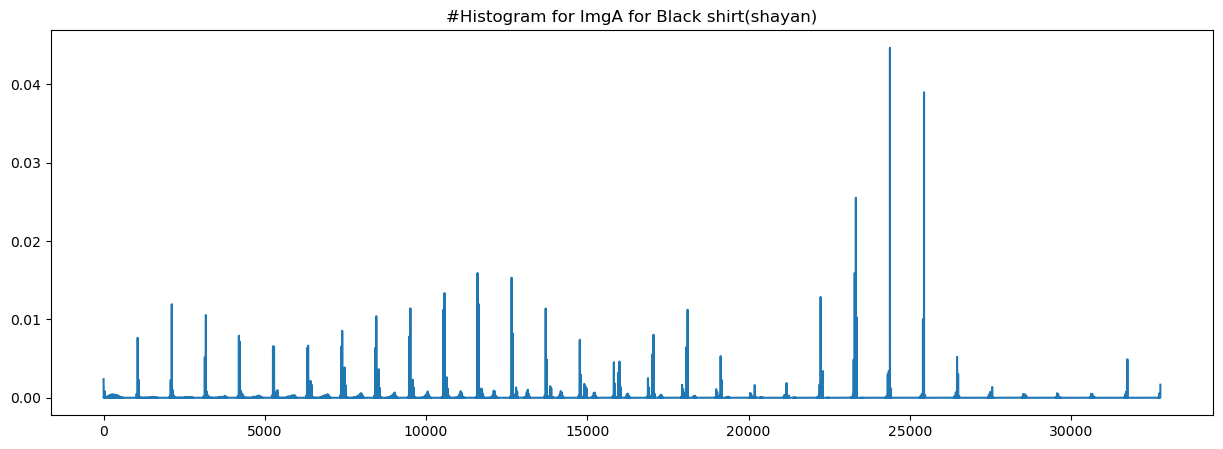

In [8]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

#Images A and B
img_a=cv2.imread('C:\\Users\\sahua\\Downloads\\EE722\\Assignment_3\\Input\\Q2_Image_A.jpg')
img_b=cv2.imread('C:\\Users\\sahua\\Downloads\\EE722\\Assignment_3\\Input\\Q2_Image_B.jpg')

#ROI 1
x1=800
x2=2100
y1=1500
y2=3460

#ROI 2
p1=2300
p2=3750
q1=1500
q2=3460

imgA_roi1=cv2.rectangle(img_a,(x1,y1),(x2,y2),(255,0,0),10)
imgA_roi1=cv2.rectangle(imgA_roi1,(p1,q1),(p2,q2),(255,0,0),10)

a1=800
a2=2300
b1=2400
b2=3700

imgA_roi=cv2.rectangle(img_b,(a1,y1),(a2,y2),(255,0,0),10)
imgA_roi=cv2.rectangle(imgA_roi,(b1,q1),(b2,q2),(255,0,0),10)

def Histogram(img,x1,x2,y1,y2):
    #height,width=img_ar.shape
    bpc=32
    bs=256/bpc
    cx=int(x2-x1/2)
    cy=int(y2-y1/2)
    #print("Cx",cx)
    sx=(x2-x1)/2
    sy=(y2-y1)/2
    #w1_a=np.zeros(shape=(y2-y1,x2-x1),dtype=float)
    V1_a=np.zeros(shape=((bpc**3)-1) ,dtype=float)
    H1_a=np.zeros(shape=((bpc**3)-1) ,dtype=float)

    for i in range(y1,y2):
      for j in range(x1,x2):
        R=img[:,:,0]
        G=img[:,:,1]
        B=img[:,:,2]
        r=int(R[i][j]/bs)
        g=int(G[i][j]/bs)
        b=int(B[i][j]/bs)
        
        bI=(r*(bpc**2)) + (g*(bpc**1)) +(b*(bpc**0))
        # print(bI)
        z=1-((((j-cx)/sx)**2)   + (((i-cy)/sy)**2))
        # print(z)
        if z>=0:
            w=z
    
        else:
            w=0
    
        if bI<(bpc**3)-1:
            V1_a[bI]=V1_a[bI]+w
    P=np.sum(V1_a) 
    H1_a=V1_a/P
    return H1_a

#Histogram for ImgA blackfor shayan
H_A1 = Histogram(img_a,x1,x2,y1,y2)
plt.figure(figsize=(15,5))
# sns.distplot(H,bins=bin_size,hist=True)
bpc=32
i=np.arange(0,(bpc**3-1))
plt.plot(i,H_A1)
plt.title("#Histogram for ImgA for Black shirt(shayan)")
plt.show()



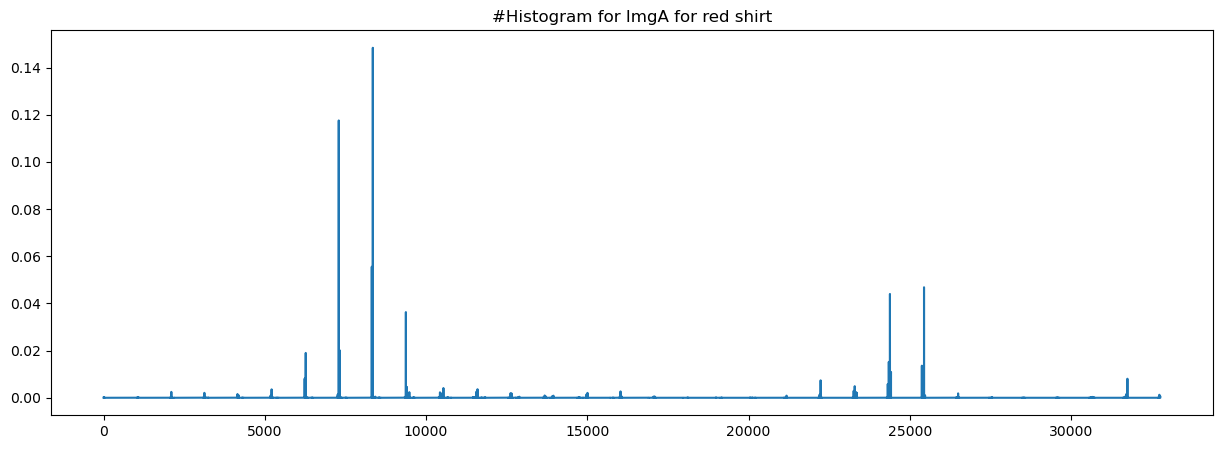

In [9]:
#Histogram for ImgA red T-shirt
H_A2 = Histogram(img_a,p1,p2,q1,q2)
plt.figure(figsize=(15,5))
# sns.distplot(H,bins=bin_size,hist=True)
bpc=32
i=np.arange(0,(bpc**3-1))
plt.plot(i,H_A2)
plt.title("#Histogram for ImgA for red shirt")
plt.show()

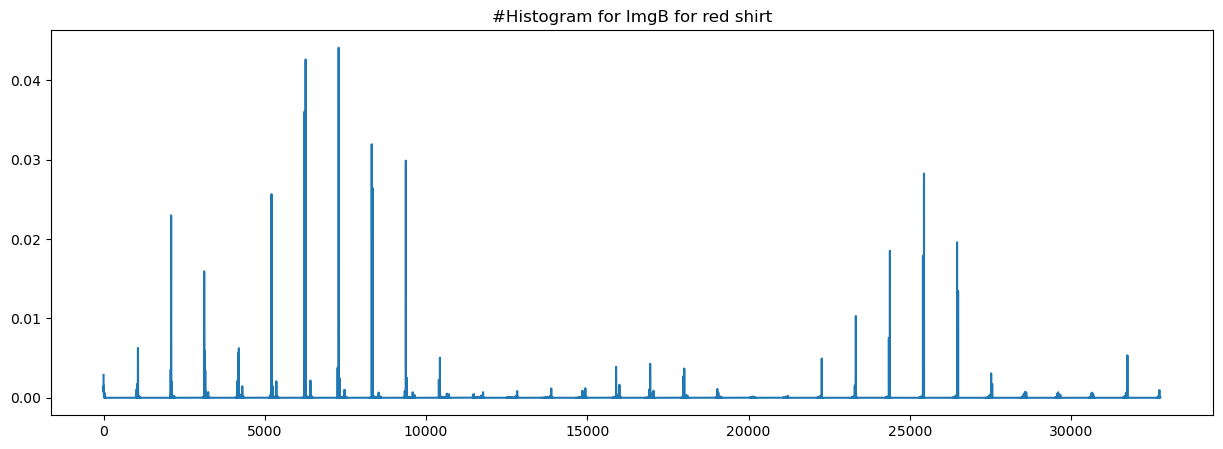

In [10]:
#Histogram for ImgB Red T-shirt
H_B1 = Histogram(img_b,a1,a2,y1,y2)
plt.figure(figsize=(15,5))
# sns.distplot(H,bins=bin_size,hist=True)
bpc=32
i=np.arange(0,(bpc**3-1))
plt.plot(i,H_B1)
plt.title("#Histogram for ImgB for red shirt")
plt.show()

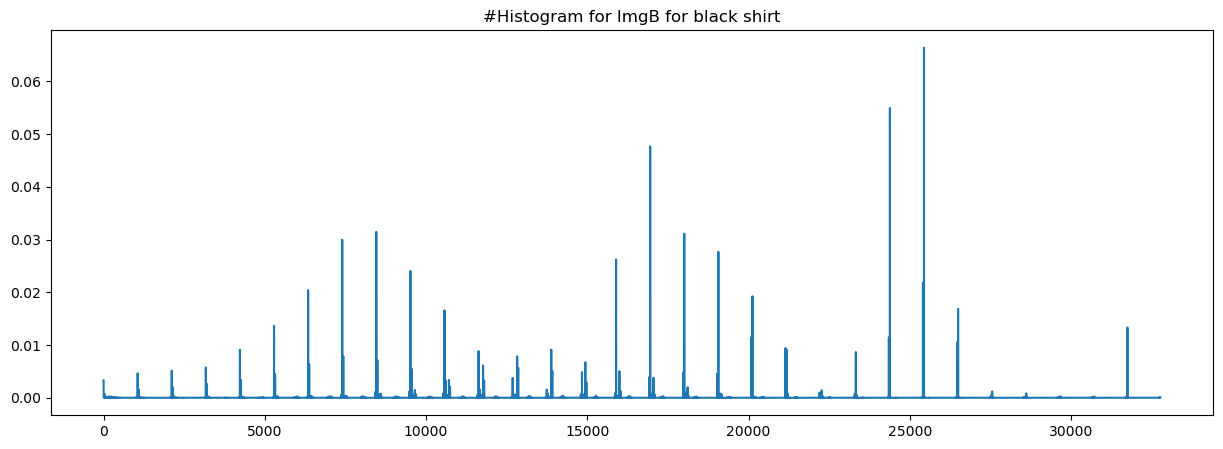

In [11]:
#Histogram for ImgB Black T-shirt
H_B2 = Histogram(img_b,b1,b2,q1,q2)
plt.figure(figsize=(15,5))
# sns.distplot(H,bins=bin_size,hist=True)
bpc=32
i=np.arange(0,(bpc**3-1))
plt.plot(i,H_B2)
plt.title("#Histogram for ImgB for black shirt")
plt.show()

In [12]:
#Distance between Histograms
def Dist(H1,H2):
    D = 0
    for i in range(len(H1)):
        if H1[i] <= H2[i]:
            D = (D + H1[i])
        else:
            D = (D + H2[i])
    return D


dist_a1_b1=Dist(H_A1,H_B1)
dist_a1_b2=Dist(H_A1,H_B2)
print("Dist bw BlackA and redB",dist_a1_b1)
print("Dist bw BlackA and BackB",dist_a1_b2)

dist_a2_b1=Dist(H_A2,H_B1)
dist_a2_b2=Dist(H_A2,H_B2)
print("Dist bw redA and redB",dist_a2_b1)
print("Dist bw redA and BackB",dist_a2_b2)

Dist bw BlackA and redB 0.16129481978123134
Dist bw BlackA and BackB 0.3291577712350271
Dist bw redA and redB 0.16026898106003765
Dist bw redA and BackB 0.08392001581033003


**Question 3**

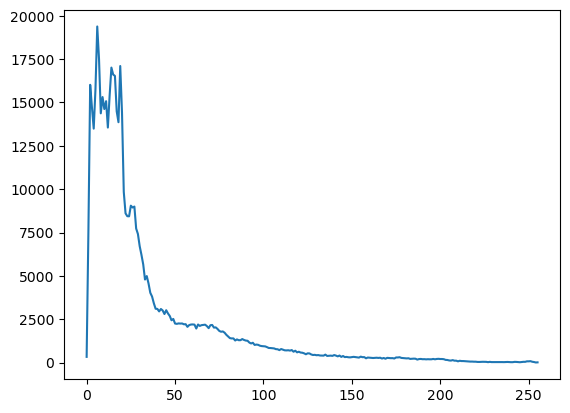

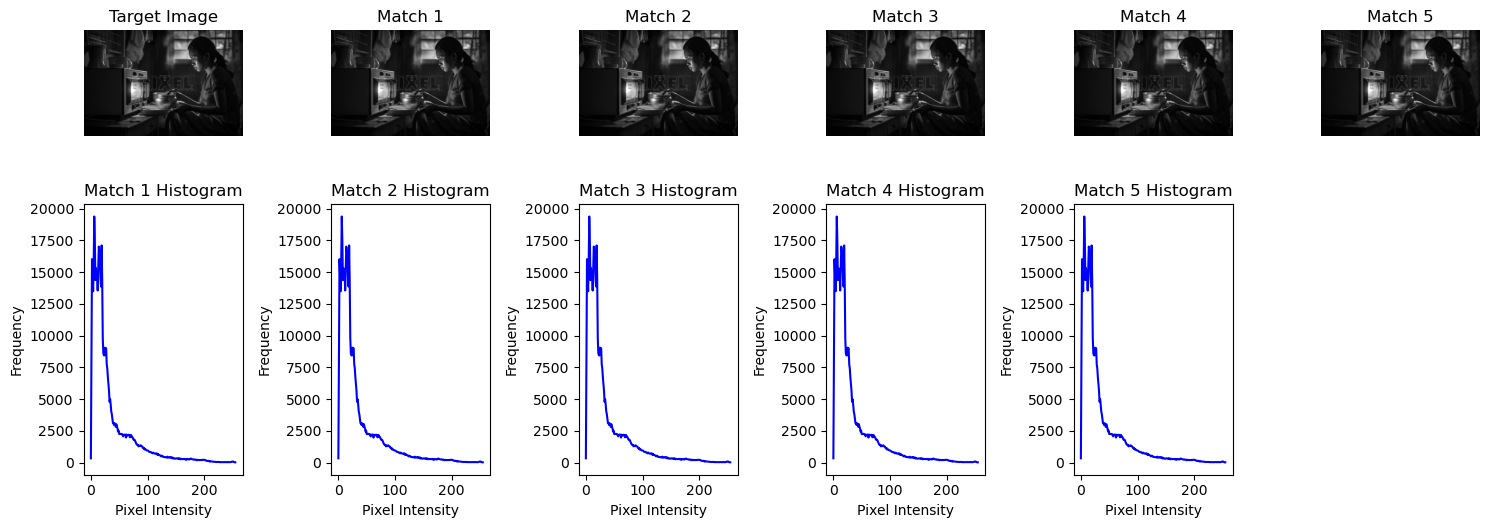

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def histogram_matching(source_img, target_histogram):
    # Compute the histograms of the source and target images
    source_hist = cv2.calcHist([source_img], [0], None, [256], [0,256])
    target_hist = target_histogram

    # Compute the cumulative distribution functions (CDFs) of the histograms
    source_cdf = source_hist.cumsum() / source_hist.sum()
    target_cdf = target_hist.cumsum() / target_hist.sum()

    # Create a mapping function to transform the pixel intensities
    mapping_func = np.interp(source_cdf, target_cdf, np.arange(256))

    # Apply the mapping function to the source image
    matched_img = mapping_func[source_img]

    # Clip the values to ensure they are within the valid range [0,255]
    matched_img = np.clip(matched_img, 0, 255)

    return matched_img.astype(np.uint8)

def compute_histogram(image):
    return cv2.calcHist([image], [0], None, [256], [0,256])

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def find_matching_images(target_img_path, folder_path, top_n=5):
    # Load target image
    target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)

    # Compute histogram of the target image
    target_hist = compute_histogram(target_img)

    # Load candidate images from the folder
    candidate_images = load_images_from_folder(folder_path)

    # Compute histogram match with each candidate image
    matches = []
    for candidate_img in candidate_images:
        matched_img = histogram_matching(candidate_img, target_hist)
        match_score = cv2.compareHist(compute_histogram(matched_img), target_hist, cv2.HISTCMP_CORREL)
        matches.append((candidate_img, match_score, matched_img))

    # Sort the matches based on similarity score
    matches.sort(key=lambda x: x[1], reverse=True)

    # Display the top matching images
    plt.figure(figsize=(15, 6))
    plt.subplot(2, top_n+1, 1)
    plt.imshow(target_img, cmap='gray')
    plt.title('Target Image')
    plt.axis('off')

    for i in range(top_n):
        plt.subplot(2, top_n+1, i+2)
        plt.imshow(matches[i][0], cmap='gray')
        plt.title(f'Match {i+1}')
        plt.axis('off')

        plt.subplot(2, top_n+1, top_n+i+2)
        plt.plot(compute_histogram(matches[i][0]), color='blue')
        plt.title(f'Match {i+1} Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
target_image_path = r'C:\\Users\\sahua\Downloads\\EE722\\Assignment_3\\Input\\Q3_Query_Image_02.jpg'
folder_path = r'C:\\Users\\sahua\\Downloads\\EE722\\Assignment_3\\Image_Dataset\\Image_Dataset'
target_img = cv2.imread(target_image_path, cv2.IMREAD_GRAYSCALE)
plt.plot(compute_histogram(target_img))
plt.show()
find_matching_images(target_image_path, folder_path)